<a href="https://colab.research.google.com/github/David-gutierrez-rodriguez/Simulacion-I/blob/main/Cat%C3%A1logo_de_distribuciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Distribución uniforme: $x \sim \mathcal{U}(a, b)$
1. Parámetros
$$a, b \in \mathbb{R}, b > a$$
2. Dominio
$$x \in [a, b]$$
3. Función de densidad
$$f(x) = \frac{1}{b - a},\; a \le x \le b$$
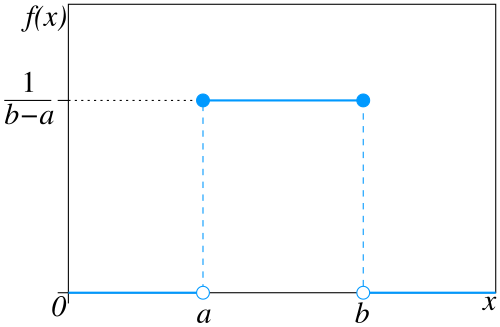
4. Función de distribución acumulada
$$F(x) = \frac{x - a}{b - a}, \; a \le x < b$$
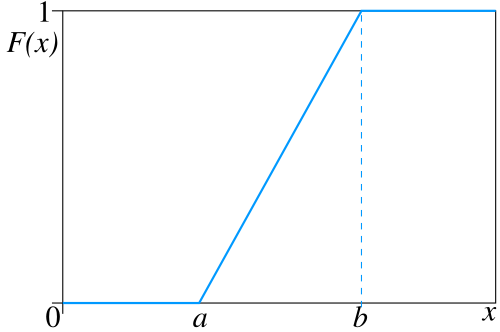
5. Media y varianza
$$\mu = \frac{a + b}{2}, \; \sigma^2 = \frac{(b - a)^2}{12}$$

## Pseudocódigo
Parámetros del generador congruencial lineal\
Constante m ← 2^31 - 1\
Constante a ← 16807\
Constante c ← 0\
Semilla x0 ← alguna semilla positiva < m

Función: Generador Congruencial Lineal\
Función GCL():\
x0 ← (a * x0 + c) mod m\
u ← x0 / m\
Retornar u

Función: Generar número Uniforme(a, b)\
Función Uniforme(a, b):\
u ← GCL()\
x ← a + (b - a) * u\
Retornar x


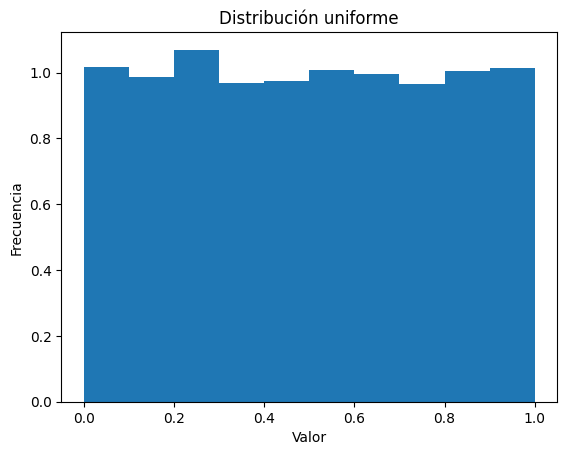

In [29]:
import matplotlib.pyplot as plt

m = 2**31 - 1
a = 16807
x0 = 123456789

def gcl(x0):
    x0 = (a*x0)%m
    return x0

def uniforme(a, b, x0, n):
    u = []
    for i in range(n):
        x0 = gcl(x0)
        u.append(a + (b - a)*x0/m)
    return u

x = uniforme(0, 1, x0, 10000)
plt.hist(x, density=True)
plt.title("Distribución uniforme")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

## Distribución triangular: $x \sim \text{Tri}(a, b, c)$
1. Parámetros  
$$a < c < b,\quad a, b, c \in \mathbb{R}$$
2. Dominio  
$$x \in [a, b]$$
3. Función de densidad  
$$
f(x) = \begin{cases}
\frac{2(x - a)}{(b - a)(c - a)} & a \le x < c \\
\frac{2(b - x)}{(b - a)(b - c)} & c \le x \le b \\
0 & \text{en otro caso}
\end{cases}
$$
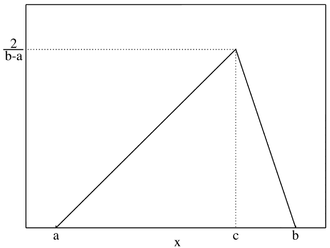
4. Función de distribución acumulada  
$$
F(x) = \begin{cases}
0 & x < a \\
\frac{(x - a)^2}{(b - a)(c - a)} & a \le x < c \\
1 - \frac{(b - x)^2}{(b - a)(b - c)} & c \le x \le b \\
1 & x > b
\end{cases}
$$
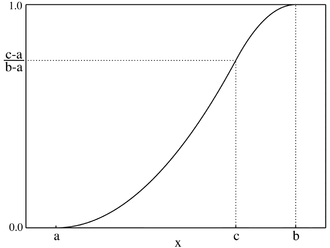
5. Media y varianza  
$$\mu = \frac{a + b + c}{3},\quad \sigma^2 = \frac{a^2 + b^2 + c^2 - ab - ac - bc}{18}$$

## Pseudocódigo
Función Triangular(a, b, c):\
Generar u ← número aleatorio uniforme en [0, 1]\
F_c ← (c - a) / (b - a)\
Si u < F_c entonces:\
x ← a + sqrt(u * (b - a) * (c - a))\
Otro caso:\
x ← b - sqrt((1 - u) * (b - a) * (b - c))\
Retornar x


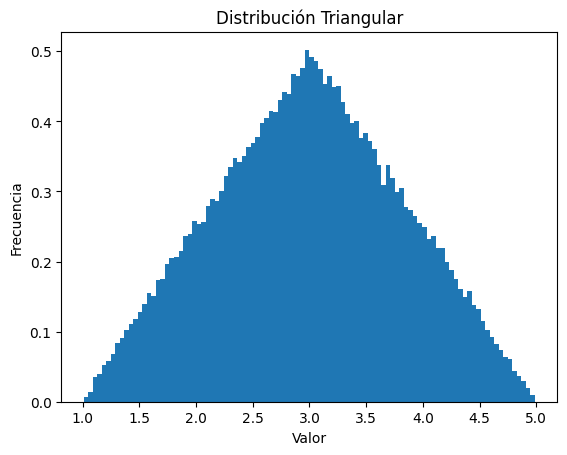

In [40]:
import numpy as np
from random import random

def trans_inv(a, b, c, n):
  x = []
  for i in range(n):
    R = random()
    if R <= (b - a)/(c - a):
      x.append(a + np.sqrt((b - a)*(c - a)*R))
    else:
      x.append(c - np.sqrt((c - a)*(c - b)*(1 - R)))
  return x

a, b, c = 1, 3, 5
tri = trans_inv(a, b, c, 100000)
plt.hist(tri, bins = 100, density=True)
plt.title('Distribución Triangular')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

## Distribución exponencial: $x \sim \text{Exp}(\lambda)$
1. Parámetro  
$$\lambda > 0$$
2. Dominio  
$$x \in [0, \infty)$$
3. Función de densidad  
$$f(x) = \lambda e^{-\lambda x},\; x \ge 0$$
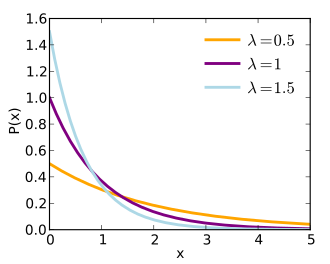
4. Función de distribución acumulada  
$$F(x) = 1 - e^{-\lambda x},\; x \ge 0$$
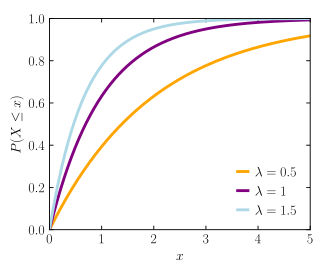
5. Media y varianza  
$$\mu = \frac{1}{\lambda},\quad \sigma^2 = \frac{1}{\lambda^2}$$

## Pseudocódigo
Función Exponencial(lambd):\
Generar u ← número aleatorio uniforme en (0, 1)\
x ← -ln(u) / lambd\
Retornar x


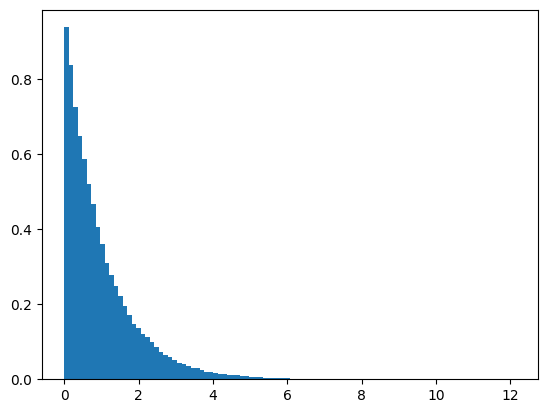

In [42]:
def exp(lambd, n):
  x = []
  for i in range(n):
    u = random()
    x.append(-np.log(u)/lambd)
  return x

x = exp(1, 100000)
plt.hist(x, bins = 100, density=True)
plt.show()

## Distribución Erlang: $x \sim$ Erlang$(n, \lambda)$
1. Parámetros  
$$n \in \mathbb{N},\quad \lambda > 0$$
2. Dominio  
$$x \in [0, \infty)$$
3. Función de densidad  
$$f(x) = \frac{\lambda^n x^{n - 1} e^{-\lambda x}}{(n - 1)!},\; x \ge 0$$
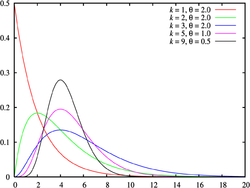
4. Función de distribución acumulada  
$$F(x) = 1 - \sum_{k = 0}^{n - 1} \frac{(\lambda x)^k}{k!} e^{-\lambda x}$$
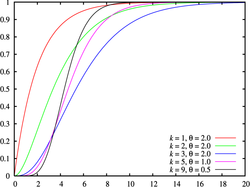
5. Media y varianza  
$$\mu = -,\quad \sigma^2 = \frac{n}{\lambda^2}$$

## Pseudocódigo
Función Erlang(k, lambda):\
x ← 0\
Para i desde 1 hasta k hacer:\
Generar u ← número aleatorio uniforme en (0, 1)\
x ← x - ln(u) / lambda\
Retornar x

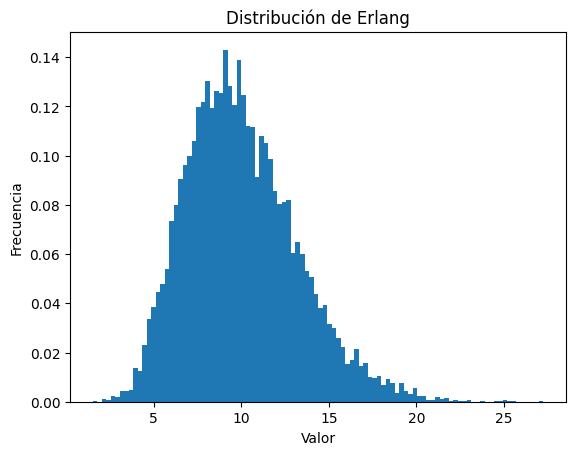

In [56]:
def Erlang(k, lambd, n):
    muestras = []
    for _ in range(n):
        x = 0
        for _ in range(k):
            u = random()
            x += -np.log(u)/lambd
        muestras.append(x)
    return muestras


x = Erlang(10, 1, 10000)
plt.hist(x, bins = 100, density=True)
plt.title('Distribución de Erlang')
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

## Distribución gamma: $x \sim \Gamma(\alpha, \beta)$
1. Parámetros  
$$\alpha, \beta > 0$$
2. Dominio  
$$x \in (0, \infty)$$
3. Función de densidad  
$$f(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha - 1} e^{-\beta x},\; x > 0$$
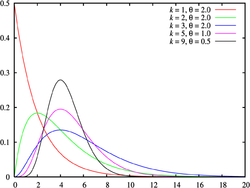
4. Función de distribución acumulada  
$$F(x) = \frac{1}{\Gamma(\alpha)} \gamma(\alpha, \beta x)$$  
Donde $\gamma(\cdot, \cdot)$ es la función gamma incompleta
5. Media y varianza  
$$\mu = \frac{\alpha}{\beta},\quad \sigma^2 = \frac{\alpha}{\beta^2}$$

## Pseudocódigo
Función Gamma(alpha, lambda):\
Si alpha < 1 entonces:\
Generar u ← uniforme(0, 1)\
x ← Gamma(alpha + 1, lambda)\
x ← x * u^(1 / alpha)\
Retornar x

d ← alpha - 1/3\
c ← 1 / sqrt(9 * d)\
Repetir:\
Generar z ← N(0, 1)\
Generar u ← uniforme(0, 1)\
v ← (1 + c * z)^3\
Si v > 0 y ln(u) < (0.5 * z^2 + d - d * v + d * ln(v)) entonces:\
x ← d * v / lambda\
Retornar x


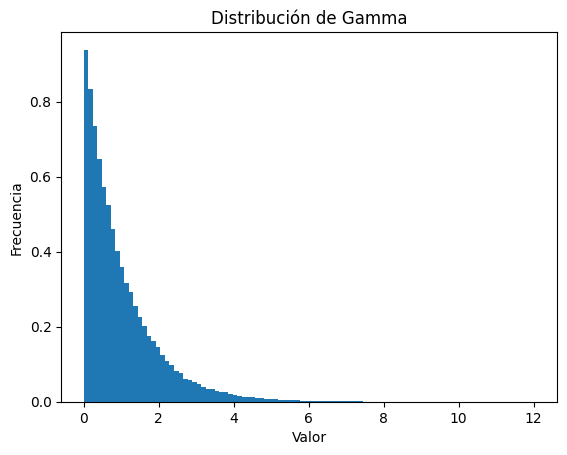

In [60]:
from math import gamma
from random import gauss

def gamma(alpha, lambd, n):
    muestras = []
    for _ in range(n):
        if alpha < 1:
            u = random.uniform(0, 1)
            x = gamma(alpha + 1, lambd, 1)[0]
            muestras.append(x * u ** (1 / alpha))
        else:
            d = alpha - 1/3
            c = 1 / np.sqrt(9 * d)
            while True:
                z = gauss(0, 1)
                u = random()
                v = (1 + c * z) ** 3
                if v > 0 and np.log(u) < 0.5 * z**2 + d * (1 - v + np.log(v)):
                    muestras.append(d * v / lambd)
                    break
    return muestras

x = gamma(1, 1, 100000)
plt.hist(x, bins = 100, density=True)
plt.title('Distribución Gamma')
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

## Distribución Weibull: $x \sim$ Weibull$(\lambda, \alpha)$
1. Parámetros  
$$\lambda, \alpha > 0$$
2. Dominio  
$$x \in (0, \infty)$$
3. Función de densidad  
$$f(x) = \lambda\alpha(\lambda x)^{\alpha - 1}e^{-(\lambda x)^\alpha},\; x \ge 0$$
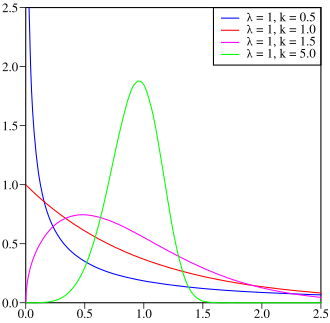
4. Función de distribución acumulada  
$$F(x) = 1 - e^{-(\lambda x)^\alpha},\; x \ge 0$$
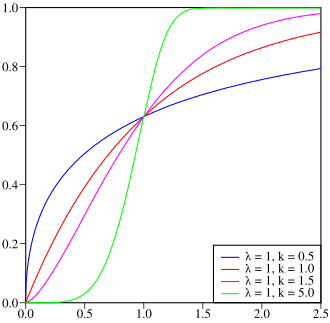
5. Media y varianza  
$$\mu = \frac{1}{\lambda}\Gamma\left(1 + \frac{1}{\alpha}\right)$$
$$\sigma^2 = \frac{1}{\lambda}\left[\Gamma\left(1 + \frac{2}{\alpha}\right) - \Gamma^2\left(1 + \frac{1}{\alpha}\right)\right]$$

## Pseudocódigo
Función Weibull(alpha, lambda):\
Generar u ← número aleatorio uniforme en (0, 1)\
x ← lambda * (-ln(1 - u))^(1 / alpha)\
Retornar x

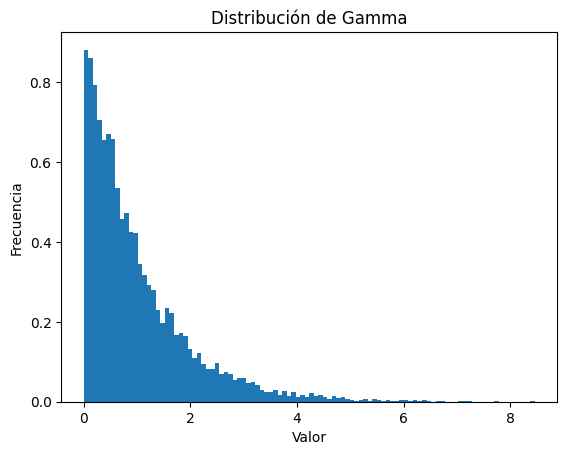

In [61]:
def weibull(alpha, lambd, n):
    muestras = []
    for _ in range(n):
        u = random()
        x = lambd * (-np.log(1 - u)) ** (1 / alpha)
        muestras.append(x)
    return muestras

x = weibull(1, 1, 10000)
plt.hist(x, bins = 100, density=True)
plt.title('Distribución Weibull')
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

## Distribución normal: $x \sim \mathcal{N}(\mu, \sigma^2)$
1. Parámetros  
$$\mu \in \mathbb{R},\quad \sigma > 0$$
2. Dominio  
$$x \in (-\infty, \infty)$$
3. Función de densidad  
$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$
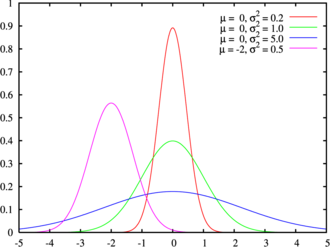
4. Función de distribución acumulada  
$$F(x) = \frac{1}{2} \left[1 + \text{erf} \left(\frac{x - \mu}{\sigma \sqrt{2}} \right) \right]$$
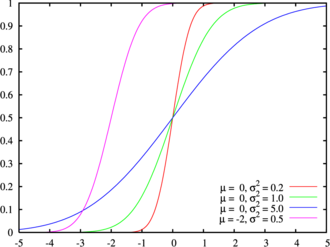
5. Media y varianza  
$$\mu = \mu,\quad \sigma^2 = \sigma^2$$

## Pseudocódigo
Función Normal(mu, sigma):\
Generar u1 ← número aleatorio uniforme en (0, 1)\
Generar u2 ← número aleatorio uniforme en (0, 1)\
z2 ← sqrt(-2 * ln(u1)) * sin(2 * pi * u2)\
z1 ← sqrt(-2 * ln(u1)) * cos(2 * pi * u2)\
x1 ← mu + sigma * z1\
x2 ← mu + sigma * z2\
Retornar x1, x2


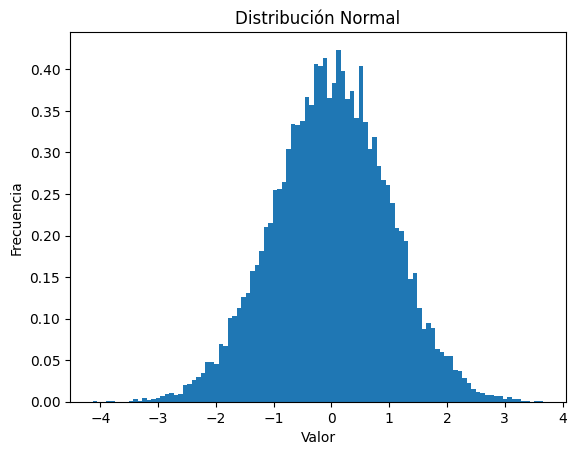

In [65]:
def normal(mu, sigma, n):
    muestras = []
    for _ in range(n):
        u1 = random()
        u2 = random()
        z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
        z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
        x1 = mu + sigma * z1
        x2 = mu + sigma * z2
        muestras.extend([x1, x2])
    return muestras

x = normal(0, 1, 10000)
plt.hist(x, bins = 100, density=True)
plt.title('Distribución Normal')
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

## Distribución log-normal: $x \sim$ LogNormal$(\mu, \sigma^2)$
1. Parámetros  
$$\mu \in \mathbb{R},\quad \sigma > 0$$
2. Dominio  
$$x \in (0, \infty)$$
3. Función de densidad
$$f(x) = \frac{1}{x \sigma \sqrt{2\pi}} e^\left( -\frac{(\ln x - \mu)^2}{2\sigma^2} \right),\; x > 0$$
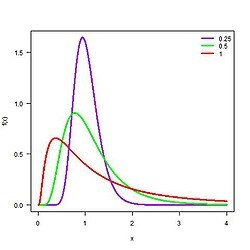
4. Función de distribución acumulada  
$$F(x) = \frac{1}{2} \left[ 1 + \text{erf}\left( \frac{\ln x - \mu}{\sigma \sqrt{2}} \right) \right]$$
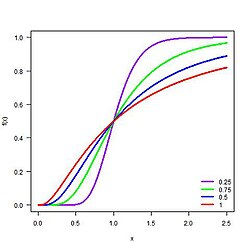
5. Media y varianza  
$$\mu = e^{\mu + \frac{\sigma^2}{2}},\quad \sigma^2 = (e^{\sigma^2} - 1)e^{2\mu + \sigma^2}$$

## Pseudocódigo
Función LogNormal(mu, sigma):\
Generar Z ← Normal(mu, sigma)\
X ← exp(Z)\
Retornar X


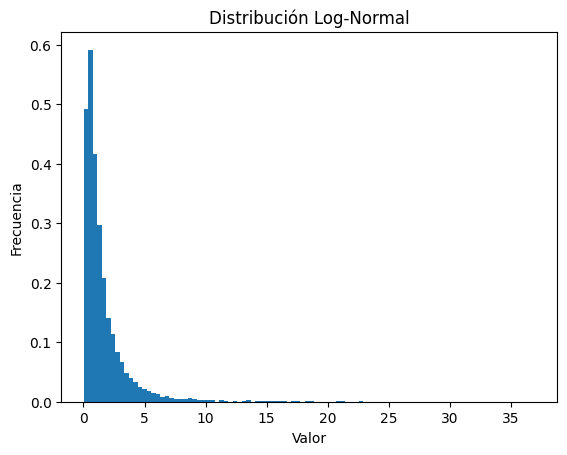

In [67]:
def lognormal(mu, sigma, n):
    muestras = []
    for _ in range(n):
        u1 = random()
        u2 = random()
        z = gauss(mu, sigma)
        x = np.exp(z)
        muestras.append(x)
    return muestras

x = lognormal(0, 1, 10000)
plt.hist(x, bins = 100, density=True)
plt.title('Distribución Log-Normal')
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

## Distribución beta: $x \sim$ Beta$(\alpha, \beta)$
1. Parámetros  
$$\alpha > 0,\quad \beta > 0$$
2. Dominio  
$$x \in (0, 1)$$
3. Función de densidad  
$$f(x) = \frac{x^{\alpha - 1}(1 - x)^{\beta - 1}}{B(\alpha, \beta)}$$  
donde $B(\alpha, \beta)$ es la función beta.
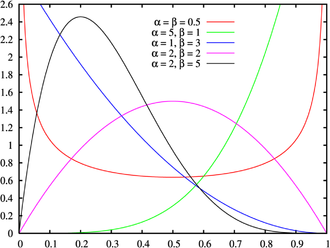
4. Función de distribución acumulada  
$$F(x) = I_x(\alpha, \beta)$$  
función beta regularizada
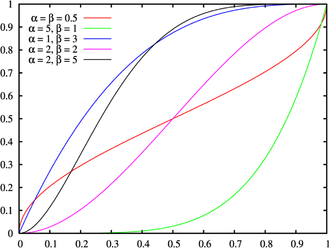
5. Media y varianza  
$$\mu = \frac{\alpha}{\alpha + \beta},\quad \sigma^2 = \frac{\alpha \beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}$$

## Pseudocódigo
Función Beta(alpha, beta):\
Generar X ← Gamma(alpha, 1)\
Generar Y ← Gamma(beta, 1)\
Z ← X / (X + Y)\
Retornar Z


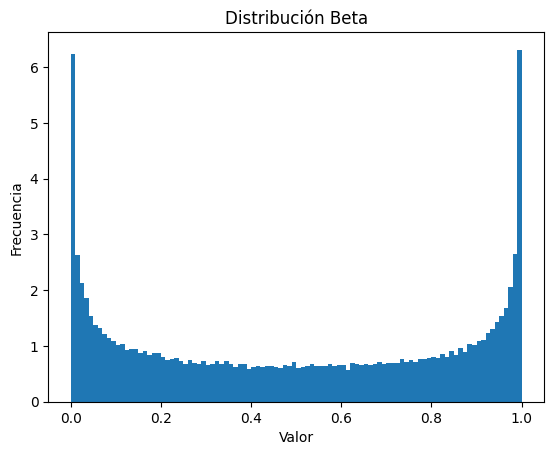

In [69]:
def beta(alpha, beta, n):
    x = np.random.gamma(alpha, 1, n)
    y = np.random.gamma(beta, 1, n)
    return x / (x + y)

x = beta(0.5, 0.5, 100000)
plt.hist(x, bins = 100, density=True)
plt.title('Distribución Beta')
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

## Distribución log-logística: $x \sim$ LL$(\alpha, \beta)$
1. Parámetros  
$$\mu \in \mathbb{R}, s > 0$$
2. Dominio  
$$x \in (-\infty, \infty)$$
3. Función de densidad  
$$f(x) = \frac{1}{4s}\text{sech}^2\left(\frac{x - \mu}{2s}\right)$$
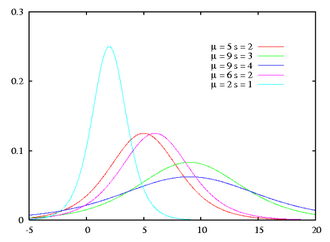
4. Función de distribución acumulada  
$$F(x) = \frac{1}{2} + \frac{1}{2}\tanh\left(\frac{x - \mu}{2s}\right)$$
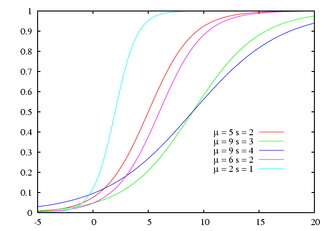
5. Media y varianza  
$$\mu = \mu, \; \sigma^2 = \frac{\pi^2}{3}s^2$$

## Pseudocódigo
Función LogLogistica(alpha, beta):\
Generar u ← número aleatorio uniforme en (0, 1)\
x ← alpha * (u / (1 - u))^(1 / beta)\
Retornar x


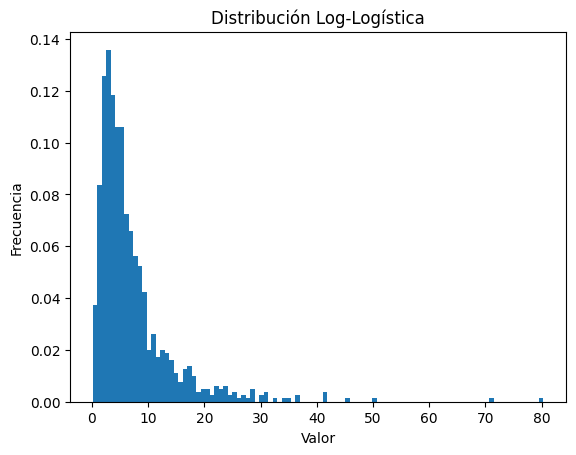

In [71]:
def loglogistica(alpha, beta, n):
    muestras = []
    for _ in range(n):
        u = random()
        x = alpha * (u / (1 - u)) ** (1 / beta)
        muestras.append(x)
    return muestras

x = loglogistica(5, 2, 1000)
plt.hist(x, bins = 100, density=True)
plt.title('Distribución Log-Logística')
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

## Distribución uniforme discreta: $x \sim \mathcal{U}\{a, b\}$
1. Parámetros  
$$a, b \in \mathbb{Z},\; b \ge a$$
2. Dominio  
$$x \in \{a, a+1, \dots, b\}$$
3. Función de masa de probabilidad  
$$P(X = x) = \frac{1}{b - a + 1},\quad x = a, \dots, b$$
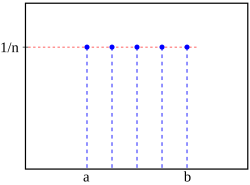
4. Función de distribución acumulada  
$$F(x) = \frac{\lfloor x \rfloor - a + 1}{b - a + 1},\quad a \le x \le b$$
5. Media y varianza  
$$\mu = \frac{a + b}{2},\quad \sigma^2 = \frac{(b - a + 1)^2 - 1}{12}$$

## Pseudocódigo
Función UniformeDiscreta(a, b):\
Generar u ← número aleatorio uniforme en (0, 1)\
x ← a + floor((b - a + 1) * u)\
Retornar x


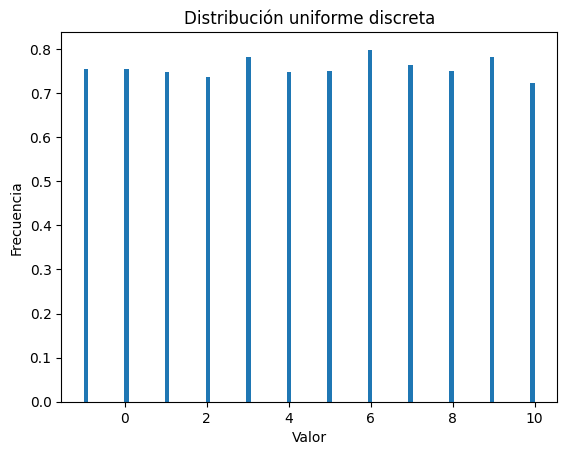

In [77]:
from math import floor

def uniforme_discreta(a, b, n):
    muestras = []
    for _ in range(n):
        u = random()
        x = a + floor((b - a + 1) * u)
        muestras.append(x)
    return muestras

x = uniforme_discreta(-1, 10, 10000)
plt.hist(x, bins = 100, density=True)
plt.title('Distribución uniforme discreta')
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

## Distribución de Bernoulli: $x \sim$ Bernoulli$(p)$
1. Parámetros  
$$p \in (0, 1)$$
2. Dominio  
$$x \in \{0, 1\}$$
3. Función de masa de probabilidad  
$$P(X = x) = p^x (1 - p)^{1 - x}$$
4. Función de distribución acumulada  
$$F(x) = \begin{cases}
0, & x < 0 \\
1 - p, & 0 \le x < 1 \\
1, & x \ge 1
\end{cases}$$
5. Media y varianza  
$$\mu = p,\quad \sigma^2 = p(1 - p)$$

## Pseudocódigo
Función Bernoulli(p):\
Generar u ← número aleatorio uniforme en (0, 1)\
Si u < p:\
Retornar 1\
Sino:\
Retornar 0


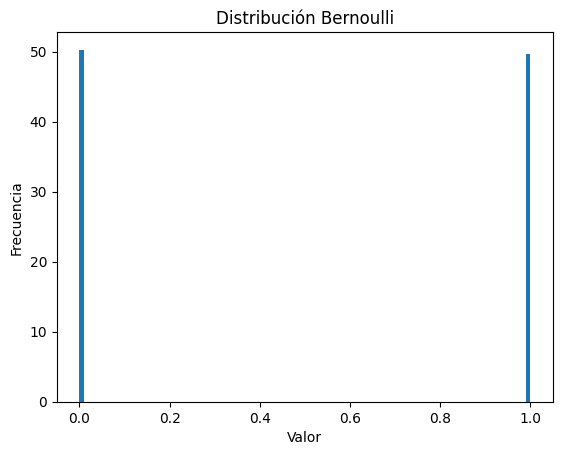

In [80]:
import random

def bernoulli(p, n):
    muestras = []
    for _ in range(n):
        u = random.uniform(0, 1)
        if u < p:
            muestras.append(1)
        else:
            muestras.append(0)
    return muestras

x = bernoulli(0.5, 10000)
plt.hist(x, bins = 100, density=True)
plt.title('Distribución Bernoulli')
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

## Distribución geométrica: $x \sim$ Geom$(p)$
1. Parámetros  
$$p \in (0, 1]$$
2. Dominio  
$$x \in \{1, 2, 3, \dots\}$$
3. Función de masa de probabilidad  
$$P(X = x) = p(1 - p)^{x - 1}$$
4. Función de distribución acumulada  
$$F(x) = 1 - (1 - p)^x$$
5. Media y varianza  
$$\mu = \frac{1}{p},\quad \sigma^2 = \frac{1 - p}{p^2}$$

## Pseudocódigo
Función Geométrica(p):\
Generar u ← número aleatorio uniforme en (0, 1)\
x ← floor( ln(u) / ln(1 - p) ) + 1\
Retornar x

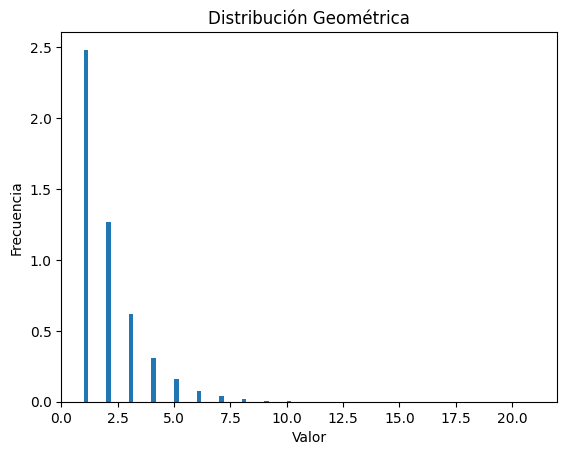

In [82]:
def geometrica(p, n):
    muestras = []
    for _ in range(n):
        u = random.uniform(0, 1)
        x = floor(np.log(u) / np.log(1 - p)) + 1
        muestras.append(x)
    return muestras

x = geometrica(0.5, 10000)
plt.hist(x, bins = 100, density=True)
plt.title('Distribución Geométrica')
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

## Distribución binomial negativa: $x \sim$ NegBin$(r, p)$
1. Parámetros  
$$r \in \mathbb{N},\; p \in (0, 1)$$
2. Dominio  
$$x \in \{0, 1, 2, \dots\}$$
3. Función de masa de probabilidad  
$$P(X = x) = \binom{r + x - 1}{x} p^r (1 - p)^x$$
4. Función de distribución acumulada  
$$F(x) = I_p(r, x + 1)$$
(función beta regularizada)
5. Media y varianza  
$$\mu = \frac{r(1 - p)}{p},\quad \sigma^2 = \frac{r(1 - p)}{p^2}$$

## Pseudocódigo
Función BinomialNegativa(r, p):\
suma ← 0\
Para i desde 1 hasta r:\
Generar u ← número aleatorio uniforme en (0, 1)\
x ← floor( ln(u) / ln(1 - p) ) + 1\
suma ← suma + x\
Retornar suma


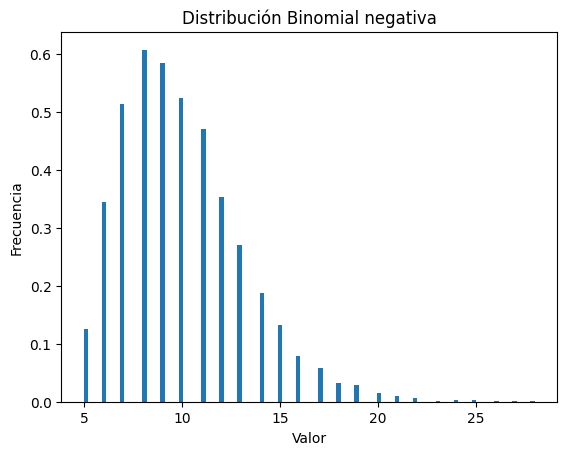

In [84]:
def binomial_negativa(r, p, n):
    resultados = []
    for _ in range(n):
        suma = 0
        for _ in range(r):
            u = random.uniform(0, 1)
            x = floor(np.log(u) / np.log(1 - p)) + 1
            suma += x
        resultados.append(suma)
    return resultados

x = binomial_negativa(5, 0.5, 10000)
plt.hist(x, bins = 100, density=True)
plt.title('Distribución Binomial negativa')
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

## Distribución de Poisson: $x \sim$ Poisson$(\lambda)$
1. Parámetros  
$$\lambda > 0$$
2. Dominio  
$$x \in \{0, 1, 2, \dots\}$$
3. Función de masa de probabilidad  
$$P(X = x) = \frac{e^{-\lambda} \lambda^x}{x!}$$
4. Función de distribución acumulada  
$$F(x) = \frac{\Gamma(\lfloor x + 1 \rfloor,  \lambda)}{\lfloor x \rfloor!}$$
($\Gamma(\cdot, \cdot)$ es la función gamma incompleta)
5. Media y varianza  
$$\mu = \lambda,\quad \sigma^2 = \lambda$$

## Pseudocódigo
Función Poisson(lambda):\
L ← exp(-lambda)\
k ← 0\
p ← 1\
Repetir:\
Generar u ← número aleatorio uniforme en (0, 1)\
p ← p * u\
k ← k + 1\
Hasta que p ≤ L\
Retornar k - 1


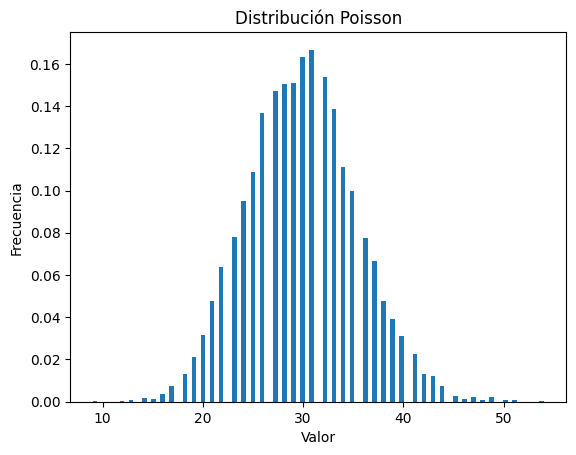

In [91]:
def poisson(lam, n):
    muestras = []
    for _ in range(n):
        L = np.exp(-lam)
        k = 0
        p = 1.0
        while p > L:
            u = random.uniform(0, 1)
            p *= u
            k += 1
        muestras.append(k - 1)
    return muestras

x = poisson(30, 10000)
plt.hist(x, bins = 100, density=True)
plt.title('Distribución Poisson')
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()